In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
df=pd.read_csv("C:\\anime.csv")
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [3]:
df[df.isnull().any(axis=1)].shape

(277, 7)

In [4]:
df.isnull().sum().sum()

317

In [5]:
df.shape

(12294, 7)

<Axes: >

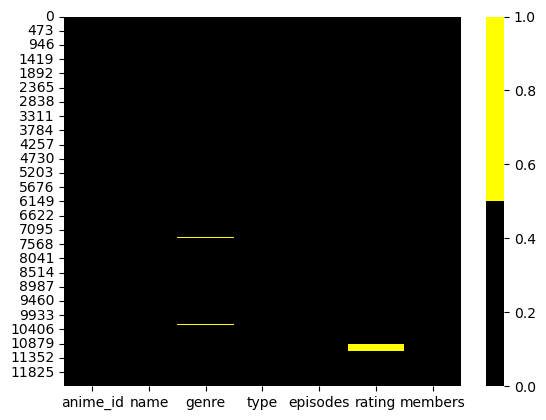

In [6]:
cols=df.columns
colours=['black','yellow']#yellowis missing. blueis not missing
sns.heatmap((df[cols].isnull()),cmap=colours)

In [7]:
df.dropna(inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12017 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12017 non-null  int64  
 1   name      12017 non-null  object 
 2   genre     12017 non-null  object 
 3   type      12017 non-null  object 
 4   episodes  12017 non-null  object 
 5   rating    12017 non-null  float64
 6   members   12017 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 751.1+ KB


In [9]:

print(len(df['type'].unique()))
df["type"].value_counts()

6


TV         3668
OVA        3284
Movie      2259
Special    1670
ONA         648
Music       488
Name: type, dtype: int64

<Axes: ylabel='type'>

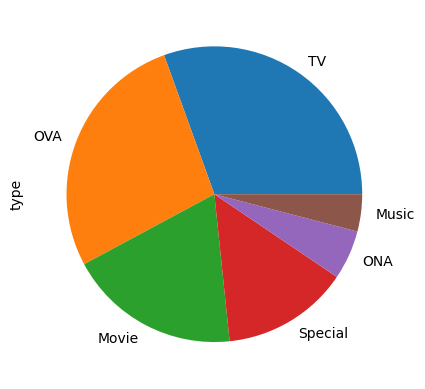

In [10]:
df["type"].value_counts().plot(kind="pie")

In [11]:
df.sort_values("genre").head(10)

,anime_id,name,genre,type,episodes,rating,members
7308,29850,AKB48 Stage Fighter,Action,Special,1,5.55,359
8266,9343,Bousou Sengokushi,Action,OVA,2,5.71,156
6739,6721,Dark Side Cat,Action,ONA,6,5.96,1821
6991,5330,Alice in Cyberland,Action,OVA,1,5.80,605
8097,32150,Ai to Shi,Action,Special,1,5.00,69
4597,29255,Ghost in the Shell Arise Episode: [.jp],Action,Special,1,6.68,2209
3685,4855,Fuuma no Kojirou: Seiken Sensou-hen,Action,OVA,6,6.91,690
10004,7527,Ponsuke no Udekurabe,Action,Movie,1,6.40,91
7370,29609,Chinka,Action,Special,1,5.49,132
6959,5232,Band of Ninja,Action,Movie,1,5.82,748


In [12]:
len(df.genre.unique())

3229

In [13]:
df["genre"].value_counts().head(50)

Hentai                                         816
Comedy                                         521
Music                                          297
Kids                                           197
Comedy, Slice of Life                          174
Dementia                                       137
Fantasy, Kids                                  128
Comedy, Kids                                   112
Fantasy                                        110
Drama, Kids                                    105
Drama                                          104
Slice of Life                                   99
Kids, Music                                     95
Comedy, Fantasy, Kids                           81
Adventure                                       79
Adventure, Kids                                 79
Adventure, Fantasy                              77
Action, Mecha, Sci-Fi                           75
Comedy, Parody                                  74
Historical                     

In [14]:
movies_df=df.pivot(index="anime_id",columns="genre",values="rating")
movies_df.head()

genre,Action,"Action, Adventure","Action, Adventure, Cars, Comedy, Sci-Fi, Shounen","Action, Adventure, Cars, Mecha, Sci-Fi, Shounen, Sports","Action, Adventure, Cars, Sci-Fi","Action, Adventure, Comedy","Action, Adventure, Comedy, Demons, Drama, Ecchi, Horror, Mystery, Romance, Sci-Fi","Action, Adventure, Comedy, Demons, Fantasy, Magic","Action, Adventure, Comedy, Demons, Fantasy, Magic, Romance, Shounen, Supernatural","Action, Adventure, Comedy, Demons, Fantasy, Martial Arts, Shounen, Super Power",...,Slice of Life,"Slice of Life, Space","Slice of Life, Supernatural",Space,Sports,"Super Power, Supernatural, Vampire",Supernatural,Thriller,Vampire,Yaoi
anime_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
movies_df.fillna(0,inplace=True)
movies_df

genre,Action,"Action, Adventure","Action, Adventure, Cars, Comedy, Sci-Fi, Shounen","Action, Adventure, Cars, Mecha, Sci-Fi, Shounen, Sports","Action, Adventure, Cars, Sci-Fi","Action, Adventure, Comedy","Action, Adventure, Comedy, Demons, Drama, Ecchi, Horror, Mystery, Romance, Sci-Fi","Action, Adventure, Comedy, Demons, Fantasy, Magic","Action, Adventure, Comedy, Demons, Fantasy, Magic, Romance, Shounen, Supernatural","Action, Adventure, Comedy, Demons, Fantasy, Martial Arts, Shounen, Super Power",...,Slice of Life,"Slice of Life, Space","Slice of Life, Supernatural",Space,Sports,"Super Power, Supernatural, Vampire",Supernatural,Thriller,Vampire,Yaoi
anime_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34476,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34490,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34503,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine,correlation

In [17]:
user_sim=1- pairwise_distances(movies_df.values,metric="cosine")

In [18]:
user_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 1.]])

In [19]:
user_sim_df=pd.DataFrame(user_sim)
user_sim_df

,0,1,2,3,4,5,6,7,8,9,...,12007,12008,12009,12010,12011,12012,12013,12014,12015,12016
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
12013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
12014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
12015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [20]:
df.anime_id.unique()

array([32281,  5114, 28977, ...,  5621,  6133, 26081], dtype=int64)

In [21]:
user_sim_df.index=df.anime_id.unique()
user_sim_df.columns=df.anime_id.unique()

In [22]:
user_sim_df.iloc[0:15,0:15]

,32281,5114,28977,9253,9969,32935,11061,820,15335,15417,4181,28851,918,2904,28891
32281,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5114,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28977,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9253,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9969,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32935,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11061,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
820,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15335,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
15417,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [23]:
np.fill_diagonal(user_sim,0)
user_sim_df.iloc[0:17,0:17]

,32281,5114,28977,9253,9969,32935,11061,820,15335,15417,4181,28851,918,2904,28891,199,23273
32281,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28977,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9253,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9969,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32935,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11061,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
820,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15335,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15417,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
user_sim_df.idxmax(axis=1).value_counts()

32281    1963
3226      815
33032     520
31389     296
3731      196
         ... 
9999        1
376         1
395         1
33021       1
30873       1
Length: 2534, dtype: int64

In [25]:
df[(df["anime_id"]==9999)|(df["anime_id"]==1)]

,anime_id,name,genre,type,episodes,rating,members
22,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,8.82,486824
2160,9999,One Piece 3D: Mugiwara Chase,"Action, Adventure, Comedy, Fantasy, Shounen",Movie,1,7.34,23772


In [26]:
user1=df[(df["anime_id"]==9999)]
user1

,anime_id,name,genre,type,episodes,rating,members
2160,9999,One Piece 3D: Mugiwara Chase,"Action, Adventure, Comedy, Fantasy, Shounen",Movie,1,7.34,23772


In [27]:
user2=df[(df["anime_id"]==1)]
user2

,anime_id,name,genre,type,episodes,rating,members
22,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,8.82,486824


In [28]:
ass1=list(set(user1.genre))
ass1

['Action, Adventure, Comedy, Fantasy, Shounen']

In [29]:
ass=list(set(user2.genre))
ass

['Action, Adventure, Comedy, Drama, Sci-Fi, Space']

In [30]:
genre_watch_dy_user1=list(set(user1.genre))
genre_watch_by_user2=list(set(user2.genre))

for genre in genre_watch_by_user2:
    if genre not in genre_watch_dy_user1:
        print("Recommendation:",genre)

Recommendation: Action, Adventure, Comedy, Drama, Sci-Fi, Space


In [31]:
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [32]:
label_encoder=preprocessing.LabelEncoder()
df['type']= label_encoder.fit_transform(df['type'])

In [47]:
x=df.iloc[:,[0,4,5,6]].astype(float)
y=df['type'].astype(float)

In [48]:
x


,anime_id,episodes,rating,members
0,32281.0,1.0,9.37,200630.0
1,5114.0,64.0,9.26,793665.0
2,28977.0,51.0,9.25,114262.0
3,9253.0,24.0,9.17,673572.0
4,9969.0,51.0,9.16,151266.0
...,...,...,...,...
12289,9316.0,1.0,4.15,211.0
12290,5543.0,1.0,4.28,183.0
12291,5621.0,4.0,4.88,219.0
12292,6133.0,1.0,4.98,175.0


In [49]:
y

0        0.0
1        5.0
2        5.0
3        5.0
4        5.0
        ... 
12289    3.0
12290    3.0
12291    3.0
12292    3.0
12293    0.0
Name: type, Length: 12017, dtype: float64

In [50]:
df['type'].unique()

array([0, 5, 3, 4, 1, 2])

In [51]:
train_x, test_x,train_y,test_y = train_test_split(x,y, test_size=0.2,random_state=30)

In [52]:
df = df.replace('Unknown', 0 )
df = df.replace('Unknown', 0)


In [53]:
# df = df.replace('Unknown', np.nan).dropna()

In [54]:
classifier=LogisticRegression()
classifier.fit(train_x,train_y)

C:\Users\priyadarsani\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [57]:
model_train=LogisticRegression()
model_train.fit(train_x,train_y)

from sklearn.metrics import classification_report
print("classification report for traning:")
print(classification_report(train_y,model_train.predict(train_x)))

classification report for traning:
              precision    recall  f1-score   support

         0.0       0.33      0.21      0.26      1776
         1.0       0.00      0.00      0.00       388
         2.0       0.00      0.00      0.00       515
         3.0       0.43      0.81      0.56      2623
         4.0       0.50      0.00      0.00      1338
         5.0       0.82      0.96      0.88      2973

    accuracy                           0.56      9613
   macro avg       0.35      0.33      0.28      9613
weighted avg       0.50      0.56      0.47      9613



C:\Users\priyadarsani\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\priyadarsani\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\priyadarsani\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and 

In [58]:
print("classufication report for testingdata")
print(classification_report(test_y,model_train.predict(test_x)))

classufication report for testingdata
              precision    recall  f1-score   support

         0.0       0.35      0.21      0.26       483
         1.0       0.00      0.00      0.00       100
         2.0       0.00      0.00      0.00       133
         3.0       0.42      0.83      0.56       661
         4.0       0.00      0.00      0.00       332
         5.0       0.83      0.97      0.89       695

    accuracy                           0.55      2404
   macro avg       0.27      0.33      0.28      2404
weighted avg       0.42      0.55      0.46      2404



C:\Users\priyadarsani\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\priyadarsani\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\priyadarsani\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [60]:
'''1. Can you explain the difference between user-based and item-based collaborative filtering?

A. User-based collaborative filtering recommends items to a user based on the preferences of similar users.
Item-based collaborative filtering recommends items that are similar to the ones a user has already liked or interacted with.

'''

'1. Can you explain the difference between user-based and item-based collaborative filtering?\n\nA. User-based collaborative filtering recommends items to a user based on the preferences of similar users.\nItem-based collaborative filtering recommends items that are similar to the ones a user has already liked or interacted with.\n\n'

In [64]:
'''
2. What is collaborative filtering, and how does it work?

A. Collaborative filtering is an information retrieval method that recommends items to users based on how other
users with similar preferences and behavior have interacted with that item.
'''

'\n2. What is collaborative filtering, and how does it work?\n\nA. Collaborative filtering is an information retrieval method that recommends items to users based on how other\nusers with similar preferences and behavior have interacted with that item.\n'